In [13]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from prophet import Prophet
import datetime

In [14]:
# Loading Sales Data
df= pd.read_csv('Pizza_Sale.csv')  # Replace with actual path

In [15]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [16]:
# Function to print unique values for each column
def print_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print("\n")

# Print unique values for all columns
print_unique_values(sales_data)

Unique values in column 'pizza_id':
[    1     2     3 ... 48618 48619 48620]


Unique values in column 'order_id':
[    1     2     3 ... 21348 21349 21350]


Unique values in column 'pizza_name_id':
['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' nan 'calabrese_m'
 'four_cheese_m' 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s'
 'spinach_fet_l' 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m'
 'southw_ckn_s' 'bbq_ckn_m' 'pepperoni_m' 'prsc_argla_s' 'sicilian_m'
 'veggie_veg_l' 'ckn_alfredo_s' 'pepperoni_s' 'green_garden_l'
 'green_garden_m' 'pep_msh_pep_l' 'hawaiian_s' 'four_cheese_l'
 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l' 's

In [17]:
# Display rows with missing values in the pizza_ingredients column
missing_ingredients = df.loc[df['pizza_ingredients'].isnull()]

# Print the rows with missing values
print("Rows with missing values in 'pizza_ingredients':")
print(missing_ingredients)

Rows with missing values in 'pizza_ingredients':
     pizza_id  order_id   pizza_name_id  quantity           order_date  \
580       581       254   five_cheese_l         1  2015-04-01 00:00:00   
581       582       255   five_cheese_l         1  2015-05-01 00:00:00   
582       583       255  green_garden_m         1  2015-05-01 00:00:00   
583       584       255      hawaiian_l         1  2015-05-01 00:00:00   
584       585       255   spinach_fet_m         1  2015-05-01 00:00:00   
585       586       256   pep_msh_pep_l         1  2015-05-01 00:00:00   
586       587       257      cali_ckn_l         1  2015-05-01 00:00:00   
630       631       277   four_cheese_m         1  2015-05-01 00:00:00   
631       632       278   ital_veggie_m         1  2015-05-01 00:00:00   
632       633       278    southw_ckn_l         1  2015-05-01 00:00:00   
633       634       279      cali_ckn_m         1  2015-05-01 00:00:00   
634       635       279   ckn_alfredo_m         1  2015-05-01 0

In [18]:
df.pizza_ingredients = df.pizza_ingredients.replace({
    'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce': "Barbecue Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",
    'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese': "Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",
    '?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic': "nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"})

In [19]:
# Fill null values in 'pizza_name_id', 'pizza_category', 'total_price', 'pizza_ingredients' column, where 'pizza_name' is 'The Five Cheese Pizza'
df.loc[(df['pizza_name'] == 'The Five Cheese Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'five_cheese_l'
df.loc[(df['pizza_name'] == 'The Five Cheese Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
df.loc[(df['pizza_name'] == 'The Five Cheese Pizza') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 18.5
df.loc[(df['pizza_name'] == 'The Five Cheese Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic'


# Fill null values in columns where pizza_name is 'The Soppressata Pizza';
df.loc[(df['pizza_name'] == 'The Soppressata Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'soppressata_l'

# Fill null values in columns where pizza_name is 'The Greek Pizza'
df.loc[(df['pizza_name'] == 'The Greek Pizza') & (df['pizza_size'] == 'S') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'the_greek_s'
df.loc[(df['pizza_name'] == 'The Greek Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'

# Fill null values in columns where pizza_name is 'The Four Cheese Pizza'
df.loc[(df['pizza_name'] == 'The Four Cheese Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'four_cheese_l'
df.loc[(df['pizza_name'] == 'The Four Cheese Pizza') & (df['pizza_size'] == 'M') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 14.75
df.loc[(df['pizza_name'] == 'The Four Cheese Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic'


# Fill null values in columns where pizza_name is 'The Napolitana Pizza'
df.loc[(df['pizza_name'] == 'The Napolitana Pizza') & (df['pizza_size'] == 'S') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'napolitana_s'
df.loc[(df['pizza_name'] == 'The Napolitana Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'


# Fill null values in columns where pizza_name is 'The Thai Chicken Pizza'
df.loc[(df['pizza_name'] == 'The Thai Chicken Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'thai_ckn_l'

# Fill null values in columns where pizza_name is 'The Green Garden Pizza'
df.loc[(df['pizza_name'] == 'The Green Garden Pizza') & (df['pizza_size'] == 'S') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'green_garden_s'
df.loc[(df['pizza_name'] == 'The Green Garden Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese'
# Fill null values in columns where pizza_name is 'The Spinach Supreme Pizza'
df.loc[(df['pizza_name'] == 'The Spinach Supreme Pizza') & (df['pizza_size'] == 'S') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'spinach_supr_s'


# Fill null values in columns where pizza_name is 'The Pepperoni Pizza'
df.loc[(df['pizza_name'] == 'The Pepperoni Pizza') & (df['pizza_size'] == 'S') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'pepperoni_s'
df.loc[(df['pizza_name'] == 'The Pepperoni Pizza') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 9.75
df.loc[(df['pizza_name'] == 'The Pepperoni Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'


# Fill null values in columns where pizza_name is 'The Barbecue Chicken Pizza'
df.loc[(df['pizza_name'] == 'The Barbecue Chicken Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'bbq_ckn_l'
df.loc[(df['pizza_name'] == 'The Barbecue Chicken Pizza') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 16.75
df.loc[(df['pizza_name'] == 'The Barbecue Chicken Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Chicken'


# Fill null values in columns where pizza_name is 'The Hawaiian Pizza'
df.loc[(df['pizza_name'] == 'The Hawaiian Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'hawaiian_l'
df.loc[(df['pizza_name'] == 'The Hawaiian Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
df.loc[(df['pizza_name'] == 'The Hawaiian Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Sliced Ham, Pineapple, Mozzarella Cheese'



# Fill null values in columns where pizza_name is 'The Italian Supreme Pizza'
df.loc[(df['pizza_name'] == 'The Italian Supreme Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'ital_supr_l'


#Fill null values in columns where pizza_name is 'The California Chicken Pizza'
df.loc[(df['pizza_name'] == 'The California Chicken Pizza') & (df['pizza_size'] == 'L') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'cali_ckn_l'
df.loc[(df['pizza_name'] == 'The California Chicken Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese'

# Fill null values in columns where pizza_name is 'The Pepper Salami Pizza'
df.loc[(df['pizza_name'] == 'The Pepper Salami Pizza') & (df['pizza_size'] == 'M') & (df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'peppr_salami_m'
df.loc[(df['pizza_name'] == 'The Pepper Salami Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
# Fill null values in columns where pizza_name is 'The Sicilian Pizza'
df.loc[(df['pizza_name'] == 'The Sicilian Pizza') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 20.25
df.loc[(df['pizza_name'] == 'The Sicilian Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'

# Fill null values in columns where pizza_name is 'The Southwest Chicken Pizza'
df.loc[(df['pizza_name'] == 'The Southwest Chicken Pizza') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 20.75
df.loc[(df['pizza_name'] == 'The Southwest Chicken Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce'

# Fill null values in columns where pizza_name is 'The Italian Capocollo Pizza'
df.loc[(df['pizza_name'] == 'The Italian Capocollo Pizza') & (df['quantity'] == 1) & (df['total_price'].isnull()), 'total_price'] = 16
df.loc[(df['pizza_name'] == 'The Italian Capocollo Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'

# Fill null values in columns where pizza_name is 'The Mexicana Pizza'
df.loc[(df['pizza_name'] == 'The Mexicana Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'

# Fill null values in columns where pizza_name is 'The Brie Carre Pizza'
df.loc[(df['pizza_name'] == 'The Brie Carre Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'

# Fill null values in columns where pizza_name is 'The Spinach Pesto Pizza'
df.loc[(df['pizza_name'] == 'The Spinach Pesto Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'

# Fill null values in columns where pizza_name is 'The Spicy Italian Pizza'
df.loc[(df['pizza_name'] == 'The Spicy Italian Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'

# Fill null values in columns where pizza_name is 'The Chicken Alfredo Pizza'
df.loc[(df['pizza_name'] == 'The Chicken Alfredo Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Chicken'
df.loc[(df['pizza_name'] == 'The Chicken Alfredo Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce'

# Fill null values in columns where pizza_name is 'The Spinach and Feta Pizza'
df.loc[(df['pizza_name'] == 'The Spinach and Feta Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
df.loc[(df['pizza_name'] == 'The Spinach and Feta Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Spinach, Mushrooms, Red Onions, Feta Cheese, Garlic'
# Fill null values in columns where pizza_name is 'The Spicy Italian Pizza'
df.loc[(df['pizza_name'] == 'The Spicy Italian Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'

# Fill null values in columns where pizza_name is 'The Prosciutto and Arugula Pizza'
df.loc[(df['pizza_name'] == 'The Prosciutto and Arugula Pizza') & (df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
df.loc[(df['pizza_name'] == 'The Prosciutto and Arugula Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Prosciutto di San Daniele, Arugula, Mozzarella Cheese'

# Fill null values in columns where pizza_name is 'The Pepperoni, Mushroom, and Peppers Pizza'
df.loc[(df['pizza_name'] == 'The Pepperoni, Mushroom, and Peppers Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Pepperoni, Mushrooms, Green Peppers'

# Fill null values in columns where pizza_name is 'The Italian Vegetables Pizza'
df.loc[(df['pizza_name'] == 'The Italian Vegetables Pizza') & (df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce'


# Fill null values in pizza_name where 'pizza_ingredients'
df.loc[(df['pizza_ingredients'] == 'Mozzarella Cheese, Pepperoni') & (df['pizza_name'].isnull()), 'pizza_name'] = 'The Pepperoni Pizza'
df.loc[(df['pizza_ingredients'] == 'Sliced Ham, Pineapple, Mozzarella Cheese') & (df['pizza_name'].isnull()), 'pizza_name'] = 'The Hawaiian Pizza'
df.loc[(df['pizza_ingredients'] == 'Bacon, Pepperoni, Italian Sausage, Chorizo Sausage') & (df['pizza_name'].isnull()), 'pizza_name'] = 'The Big Meat Pizza'
df.loc[(df['pizza_ingredients'] == 'Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic') & (df['pizza_name'].isnull()), 'pizza_name'] = 'The Spicy Italian Pizza'
df.loc[(df['pizza_ingredients'] == 'Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic') & (df['pizza_name'].isnull()), 'pizza_name'] = 'The Sicilian Pizza'
df.loc[(df['pizza_ingredients'] == 'Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic') & (df['pizza_name'].isnull()), 'pizza_name'] = 'The Mexicana Pizza'

In [20]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [21]:
def remove_outliers(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for numerical_column in numerical_columns:
        print(f"\nProcessing column: {numerical_column}")
        
        # Print rows before removing outliers
        print("Rows before removing outliers:")
        print(df[numerical_column].describe())
        
        # Calculate Q1, Q3, and IQR
        Q1 = df[numerical_column].quantile(0.25)
        Q3 = df[numerical_column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filter out outliers
        df = df[(df[numerical_column] >= (Q1 - 1.5 * IQR)) & (df[numerical_column] <= (Q3 + 1.5 * IQR))]
        
        # Print rows after removing outliers
        print("\nRows after removing outliers:")
        print(df[numerical_column].describe())
    
    return df
df_filtered = remove_outliers(df)

# Save the filtered DataFrame
df_filtered.to_csv(r"C:\Users\surya\Downloads\pizza_sales_pre_processed.csv", index=False)


Processing column: pizza_id
Rows before removing outliers:
count    48620.000000
mean     24310.500000
std      14035.529381
min          1.000000
25%      12155.750000
50%      24310.500000
75%      36465.250000
max      48620.000000
Name: pizza_id, dtype: float64

Rows after removing outliers:
count    48620.000000
mean     24310.500000
std      14035.529381
min          1.000000
25%      12155.750000
50%      24310.500000
75%      36465.250000
max      48620.000000
Name: pizza_id, dtype: float64

Processing column: order_id
Rows before removing outliers:
count    48620.000000
mean     10701.479761
std       6180.119770
min          1.000000
25%       5337.000000
50%      10682.500000
75%      16100.000000
max      21350.000000
Name: order_id, dtype: float64

Rows after removing outliers:
count    48620.000000
mean     10701.479761
std       6180.119770
min          1.000000
25%       5337.000000
50%      10682.500000
75%      16100.000000
max      21350.000000
Name: order_id, dtype

In [23]:
import pandas as pd
df=pd.read_csv(r"C:\Users\surya\Downloads\pizza_sales_pre_processed.csv")
#check the mean, median, mode, std and var 
#here I check numerical columns like continuous dataset 
stats = {'mean': [df['unit_price'].mean(), df['total_price'].mean(), df['quantity'].mean()],
         'median': [df['unit_price'].median(), df['total_price'].median(), df['quantity'].median()],
         'mode': [df['unit_price'].mode()[0], df['total_price'].mode()[0], df['quantity'].mode()[0]],
         'std': [df['unit_price'].std(), df['total_price'].std(), df['quantity'].std()],
         'var': [df['unit_price'].var(), df['total_price'].var(), df['quantity'].var()]
        }
#view in df
compare = pd.DataFrame(stats, index = ['unit_price', 'total_price', 'quantity'])
compare
#here in total_price, mean is more than median i.e. right skewed distribution

,mean,median,mode,std,var
unit_price,16.478559,16.5,20.75,3.591792,12.900971
total_price,16.478559,16.5,20.75,3.591792,12.900971
quantity,1.000000,1.0,1.00,0.000000,0.000000


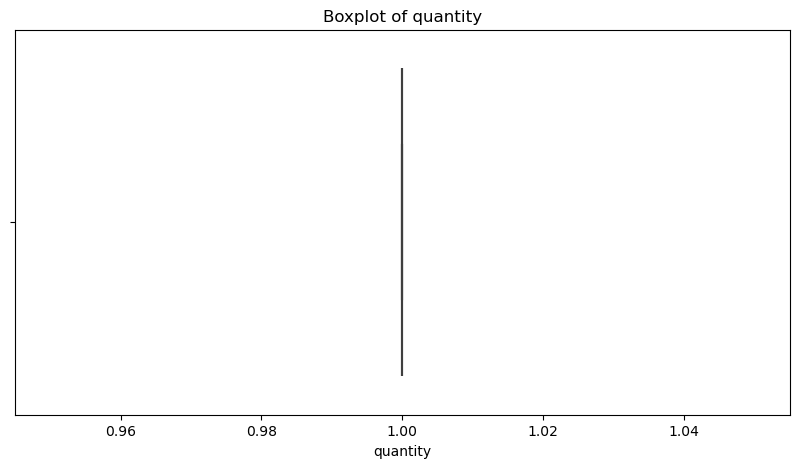

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Quantity Sold
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['quantity'])
plt.title('Boxplot of quantity')
plt.show()


In [26]:
# Define a list of date formats to try
date_formats = ['%d-%m-%Y', '%d/%m/%Y']

def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the parsing function to the 'date' column
df['order_date'] = df['order_date'].apply(parse_dates)

# Convert to the desired format
df['order_date'] = df['order_date'].dt.strftime('%d-%m-%Y')

print(df)

       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1         NaN   11:38:36   
1             2         2  classic_dlx_m         1         NaN   11:57:40   
2             3         2  five_cheese_l         1         NaN   11:57:40   
3             4         2    ital_supr_l         1         NaN   11:57:40   
4             5         2     mexicana_m         1         NaN   11:57:40   
...         ...       ...            ...       ...         ...        ...   
47660     48616     21348  ckn_alfredo_m         1  31-12-2015   21:23:10   
47661     48617     21348  four_cheese_l         1  31-12-2015   21:23:10   
47662     48618     21348   napolitana_s         1  31-12-2015   21:23:10   
47663     48619     21349     mexicana_l         1  31-12-2015   22:09:54   
47664     48620     21350      bbq_ckn_s         1  31-12-2015   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.

In [27]:
#Convert the date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format = '%d-%m-%Y')

# Step 2: Extract time features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.day_name()

# Verify the data types
print(df.dtypes)

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
year                        float64
month                        object
day_of_week                  object
dtype: object


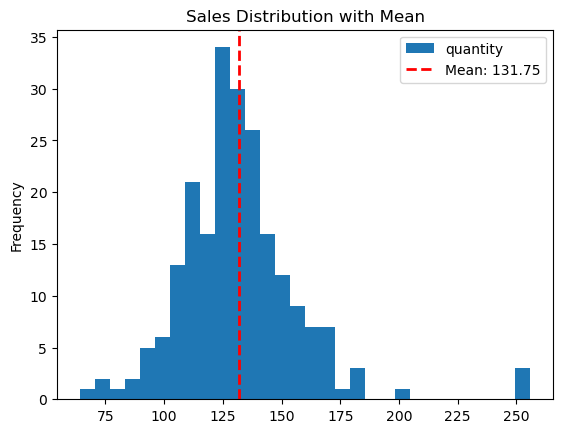

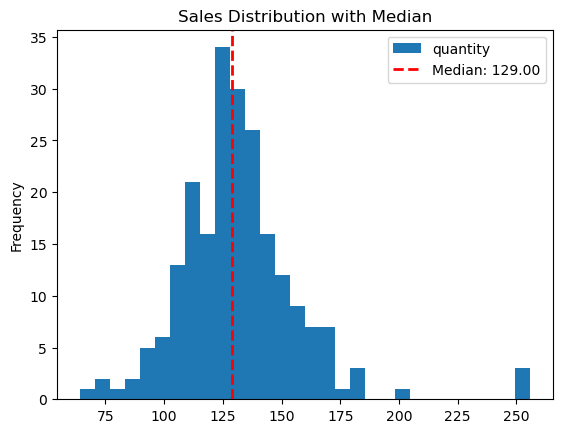

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'order_date' and 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate mean sales threshold
Mean_sales_threshold = df_daily_count['quantity'].mean()

# Visualize sales distribution with the mean
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Mean')
plt.axvline(Mean_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {Mean_sales_threshold:.2f}')
plt.legend()
plt.show()

# Calculate median sales threshold
Median_sales_threshold = df_daily_count['quantity'].median()

# Visualize sales distribution with the median
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Median')
plt.axvline(Median_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Median: {Median_sales_threshold:.2f}')
plt.legend()
plt.show()

  order_date  quantity          sales_type
0 2015-01-13       114        Normal Sales
1 2015-01-14       138  Promotional Period
2 2015-01-15       123        Normal Sales
3 2015-01-16       152  Promotional Period
4 2015-01-17       119        Normal Sales


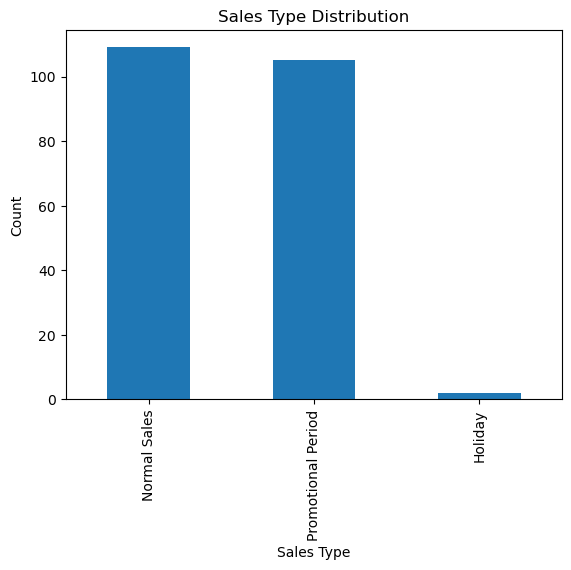

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Assuming df is your DataFrame and it has columns 'order_date' and 'quantity'
# Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate the median sales threshold
Median_sales_threshold = df_daily_count['quantity'].median()

# Load US holidays for 2015
us_holidays = holidays.US(years=2015)

# Function to classify the date as 'Normal', 'Holiday', or 'Promotional Period'
def classify_sales(row):
    if row['quantity'] > Median_sales_threshold:
        if row['order_date'] in us_holidays:
            return 'Holiday'
        else:
            return 'Promotional Period'
    else:
        return 'Normal Sales'

# Apply the classification function
df_daily_count['sales_type'] = df_daily_count.apply(classify_sales, axis=1)

# Check the classified DataFrame
print(df_daily_count.head())

# Optional: Visualize the classified sales types
df_daily_count['sales_type'].value_counts().plot(kind='bar', title='Sales Type Distribution')
plt.xlabel('Sales Type')
plt.ylabel('Count')
plt.show()

In [30]:
df_daily_count = pd.get_dummies(df_daily_count, columns=['sales_type'])

In [31]:
df_daily_count

,order_date,quantity,sales_type_Holiday,sales_type_Normal Sales,sales_type_Promotional Period
0,2015-01-13,114,0,1,0
1,2015-01-14,138,0,0,1
2,2015-01-15,123,0,1,0
3,2015-01-16,152,0,0,1
4,2015-01-17,119,0,1,0
...,...,...,...,...,...
211,2015-12-27,85,0,1,0
212,2015-12-28,102,0,1,0
213,2015-12-29,74,0,1,0
214,2015-12-30,64,0,1,0


In [32]:
df_daily_count=df_daily_count.rename(columns={'sales_type_Holiday': 'Holiday', 'sales_type_Normal Sales': 'Normal Sales', 
                                                'sales_type_Promotional Period': 'Promotional Period'})
df_daily_count['Holiday'] = df_daily_count['Holiday'].map({True: 1, False: 0})
df_daily_count['Normal Sales'] = df_daily_count['Normal Sales'].map({True: 1, False: 0})
df_daily_count['Promotional Period'] = df_daily_count['Promotional Period'].map({True: 1, False: 0})

In [33]:
df_daily_count

,order_date,quantity,Holiday,Normal Sales,Promotional Period
0,2015-01-13,114,NaN,NaN,NaN
1,2015-01-14,138,NaN,NaN,NaN
2,2015-01-15,123,NaN,NaN,NaN
3,2015-01-16,152,NaN,NaN,NaN
4,2015-01-17,119,NaN,NaN,NaN
...,...,...,...,...,...
211,2015-12-27,85,NaN,NaN,NaN
212,2015-12-28,102,NaN,NaN,NaN
213,2015-12-29,74,NaN,NaN,NaN
214,2015-12-30,64,NaN,NaN,NaN


In [34]:
df = pd.merge(df, df_daily_count, on='order_date', how='inner')

In [35]:
df=df.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'Total quantity per day'})

In [37]:
df.to_csv(r"C:\Users\surya\Downloads\ pizza_sales_pre_processed_1.csv")

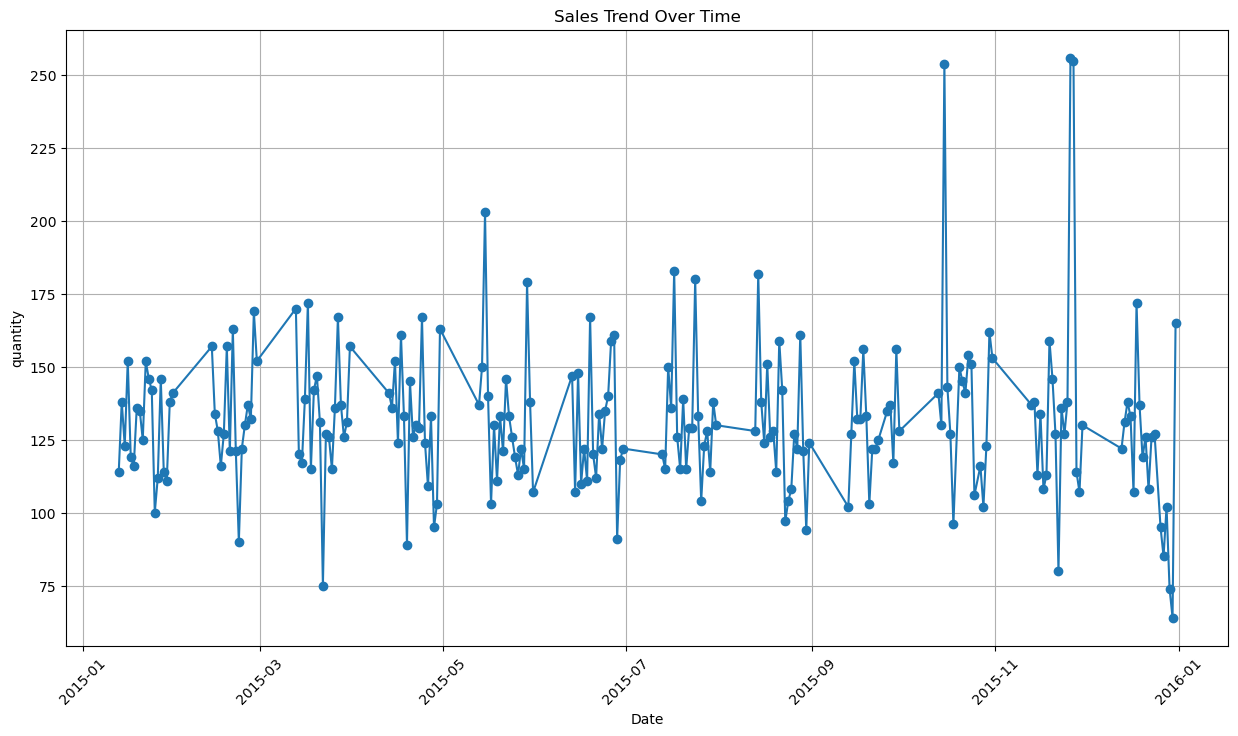

In [38]:
# Group data by date and sum quantities
sales_trend = df.groupby('order_date')['quantity'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(15, 8))
plt.plot(sales_trend['order_date'], sales_trend['quantity'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('quantity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

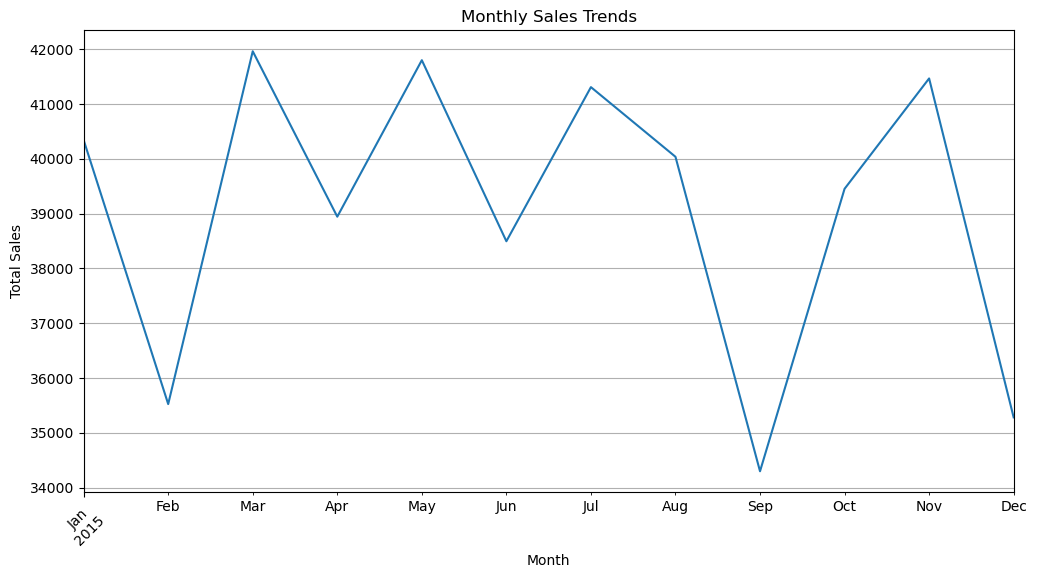

In [39]:
# Ensure 'total_price' is a numerical column
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')

# Aggregate total sales by month
monthly_sales = df.resample('M', on='order_date')['total_price'].sum()

# Plotting the monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


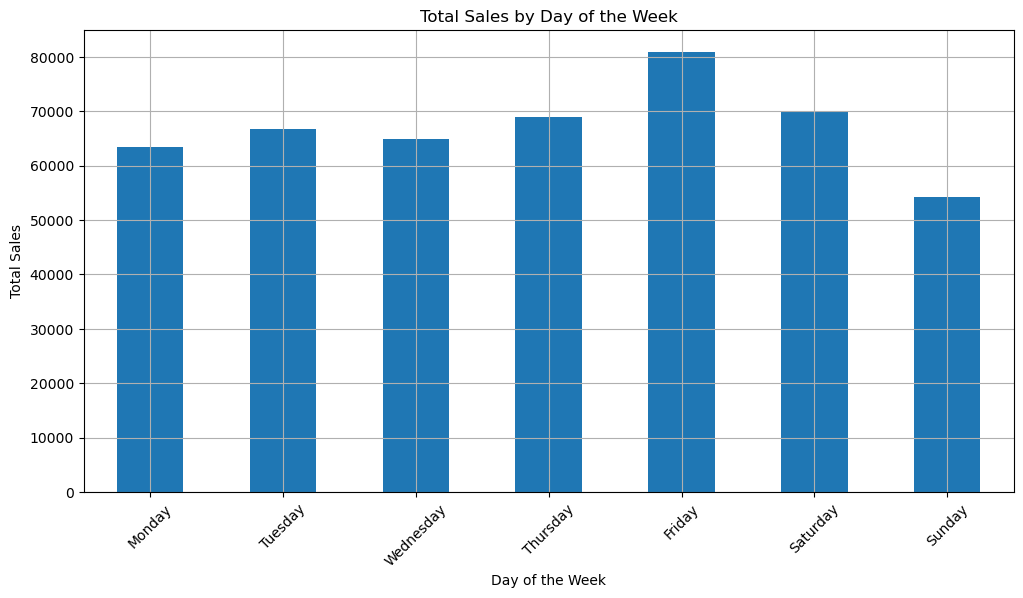

In [40]:
# Grouping by day of the week
weekly_sales = df.groupby('day_of_week')['total_price'].sum()

# Reorder days for better visualization
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)

# Plotting sales by day of the week
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

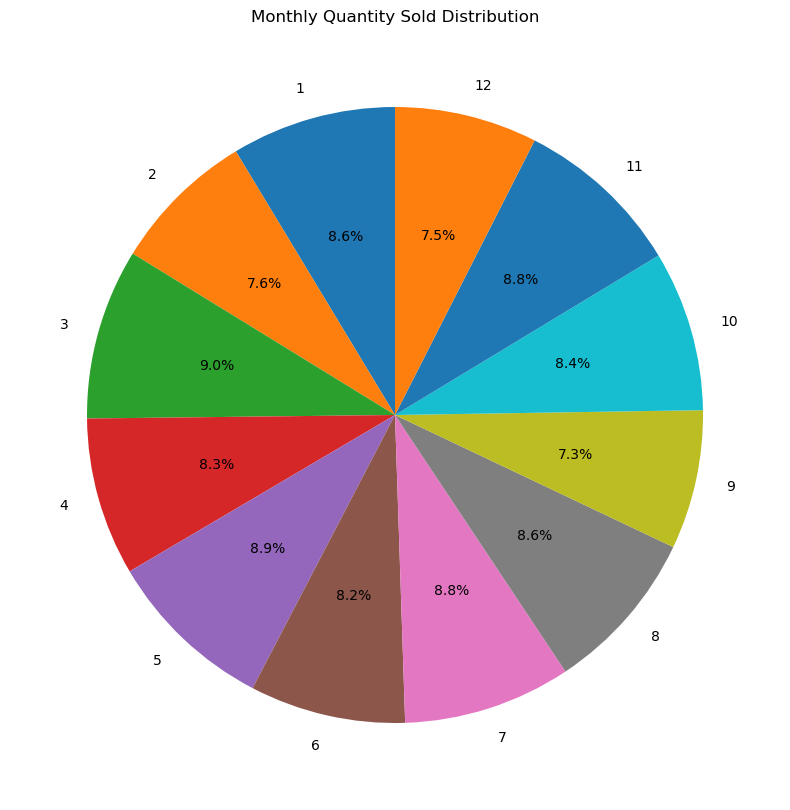

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data
sales_data = pd.read_csv(r"C:\Users\surya\Downloads\ pizza_sales_pre_processed_1.csv")

# Convert 'order_date' to datetime
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Extract the month from the order date
sales_data['month'] = sales_data['order_date'].dt.month

# Aggregate sales data by month
monthly_quantity = sales_data.groupby('month')['quantity'].sum()

# Plotting monthly quantity sold as a pie chart
plt.figure(figsize=(10, 10))
monthly_quantity.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Monthly Quantity Sold Distribution')
plt.ylabel('')  # Hides the y-label
plt.show()

In [45]:
import pandas as pd
df1 = pd.read_csv("Pizza_ingredients.csv")
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [46]:
# Check for duplicate rows
duplicates = df1.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

# Remove duplicate rows if any
df1 = df1.drop_duplicates()

# Verify that there are no more duplicates
duplicates_after = df1.duplicated().sum()
print("Number of duplicate rows after cleaning: ", duplicates_after)

Number of duplicate rows:  0
Number of duplicate rows after cleaning:  0


In [47]:
unique_values = {column: df[column].unique() for column in df.columns}

# Print the unique values
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()

Unique values for column 'pizza_name_id':
['bbq_ckn_l' 'bbq_ckn_m' 'bbq_ckn_s' 'big_meat_s' 'brie_carre_s'
 'calabrese_l' 'calabrese_m' 'calabrese_s' 'cali_ckn_l' 'cali_ckn_m'
 'cali_ckn_s' 'ckn_alfredo_l' 'ckn_alfredo_m' 'ckn_alfredo_s'
 'ckn_pesto_l' 'ckn_pesto_m' 'ckn_pesto_s' 'classic_dlx_l' 'classic_dlx_m'
 'classic_dlx_s' 'five_cheese_l' 'four_cheese_l' 'four_cheese_m'
 'green_garden_l' 'green_garden_m' 'green_garden_s' 'hawaiian_l'
 'hawaiian_m' 'hawaiian_s' 'ital_cpcllo_l' 'ital_cpcllo_m' 'ital_cpcllo_s'
 'ital_supr_l' 'ital_supr_m' 'ital_supr_s' 'ital_veggie_l' 'ital_veggie_m'
 'ital_veggie_s' 'mediterraneo_l' 'mediterraneo_m' 'mediterraneo_s'
 'mexicana_l' 'mexicana_m' 'mexicana_s' 'napolitana_l' 'napolitana_m'
 'napolitana_s' 'pep_msh_pep_l' 'pep_msh_pep_m' 'pep_msh_pep_s'
 'pepperoni_l' 'pepperoni_m' 'pepperoni_s' 'peppr_salami_l'
 'peppr_salami_m' 'peppr_salami_s' 'prsc_argla_l' 'prsc_argla_m'
 'prsc_argla_s' 'sicilian_l' 'sicilian_m' 'sicilian_s' 'soppressata_l'
 'soppres

In [49]:
#fill the null values
df1.loc[(df1['pizza_ingredients'] == 'Caramelized Onions') & (df1['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0
df1.loc[(df1['pizza_name_id'] == 'hawaiian_l') & (df1['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 60.0
df1.loc[(df1['pizza_name_id'] == 'hawaiian_m') & (df1['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 40.0
df1.loc[(df1['pizza_name_id'] == 'hawaiian_s') & (df1['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0

In [52]:
df1.Items_Qty_In_Grams = df1.Items_Qty_In_Grams.astype(int)
df1.pizza_ingredients = df1.pizza_ingredients.replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})
Output_path = r"C:\Users\surya\Downloads\Pizza_ingredients_cleaned.csv"
df1.to_csv(Output_path, index=False)

In [55]:
ingredients_data=pd.read_csv( r"C:\Users\surya\Downloads\Pizza_ingredients_cleaned.csv")
ingredients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pizza_name_id       518 non-null    object
 1   pizza_name          518 non-null    object
 2   pizza_ingredients   518 non-null    object
 3   Items_Qty_In_Grams  518 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 16.3+ KB


In [58]:
import pandas as pd
sales_data=pd.read_csv(r"C:\Users\surya\Downloads\ pizza_sales_pre_processed_1.csv")


In [59]:
ingredients_data=pd.read_csv(r"C:\Users\surya\Downloads\Pizza_ingredients_cleaned.csv")

In [60]:
import pandas as pd

# Load the sales data
sales_data = pd.read_csv(r"C:\Users\surya\Downloads\ pizza_sales_pre_processed_1.csv")

# Ensure order_date column is in datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Create a 'week' column based on the order_date
sales_data['week'] = sales_data['order_date'].dt.isocalendar().week

# Filter for week 7
week_7_sales = sales_data[sales_data['week'] == 7]

# Group by pizza name and sum the quantities
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# List all grouped pizza names and their total quantities
print("Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

# Calculate and print the total quantity sold in week 7
total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

Pizzas sold in week 7:
The Barbecue Chicken Pizza: 24 pizzas
The Big Meat Pizza: 19 pizzas
The Brie Carre Pizza: 4 pizzas
The Calabrese Pizza: 12 pizzas
The California Chicken Pizza: 23 pizzas
The Chicken Alfredo Pizza: 10 pizzas
The Chicken Pesto Pizza: 9 pizzas
The Classic Deluxe Pizza: 15 pizzas
The Five Cheese Pizza: 10 pizzas
The Four Cheese Pizza: 15 pizzas
The Greek Pizza: 13 pizzas
The Green Garden Pizza: 12 pizzas
The Hawaiian Pizza: 15 pizzas
The Italian Capocollo Pizza: 14 pizzas
The Italian Supreme Pizza: 18 pizzas
The Italian Vegetables Pizza: 9 pizzas
The Mediterranean Pizza: 4 pizzas
The Mexicana Pizza: 16 pizzas
The Napolitana Pizza: 11 pizzas
The Pepper Salami Pizza: 8 pizzas
The Pepperoni Pizza: 20 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 11 pizzas
The Prosciutto and Arugula Pizza: 13 pizzas
The Sicilian Pizza: 17 pizzas
The Soppressata Pizza: 7 pizzas
The Southwest Chicken Pizza: 21 pizzas
The Spicy Italian Pizza: 15 pizzas
The Spinach Pesto Pizza: 5 pizzas

10:03:16 - cmdstanpy - INFO - Chain [1] start processing
10:03:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model MAPE: 112.64%


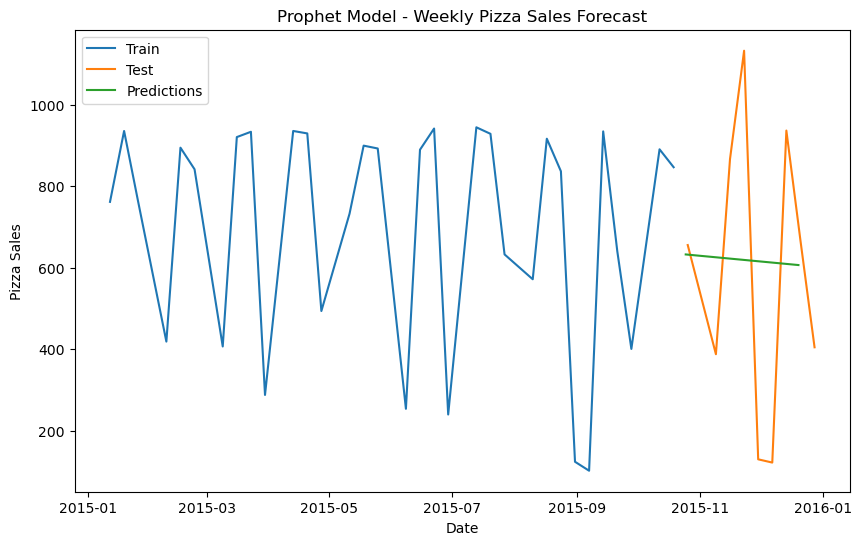

In [61]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the sales data
sales_data = pd.read_csv(r"C:\Users\surya\Downloads\ pizza_sales_pre_processed_1.csv")
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Aggregate pizza sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly_sales.columns = ['ds', 'y']
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(sales_data)

# Split data into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Train the Prophet model
prophet_model = Prophet()
prophet_model.fit(train)

# Make predictions for the test set
future = prophet_model.make_future_dataframe(periods=len(test), freq='W')
forecast = prophet_model.predict(future)

# Extract the forecasted values for the test period
predictions = forecast[['ds', 'yhat']].tail(len(test)).set_index('ds')

# Define MAPE function
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100

# Evaluate the model
actual = test.set_index('ds')['y']
predicted = predictions['yhat']
prophet_mape_score = mape(actual, predicted)

print(f"Prophet Model MAPE: {prophet_mape_score:.2f}%")

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(predictions.index, predictions['yhat'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Pizza Sales')
plt.title('Prophet Model - Weekly Pizza Sales Forecast')
plt.legend()
plt.show()

In [62]:
pd.set_option("display.max_rows", None)

In [63]:
import pandas as pd
from prophet import Prophet
import warnings
import logging

# Suppress warnings
warnings.filterwarnings("ignore")

# Suppress cmdstanpy logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# Load the pizza sales data
pizza_sales = pd.read_csv(r"C:\Users\surya\Downloads\ pizza_sales_pre_processed_1.csv")

# Step 1: Data Preparation - Aggregate pizza sales by week and pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(pizza_sales)

# Step 2: Create a function to forecast for each pizza type
def forecast_sales_per_pizza_type(pizza_type, train, periods=7):
    # Initialize the Prophet model
    model = Prophet()
    model.fit(train)
    
    # Create a dataframe for future predictions
    future = model.make_future_dataframe(periods=periods, freq='D')
    
    # Forecast
    forecast = model.predict(future)
    
    # Extract the forecast for the specified period
    forecasted_values = forecast[['ds', 'yhat']].tail(periods)['yhat'].tolist()
    
    return pizza_type, forecasted_values

# Step 3: Forecast for each pizza type for the next week
def forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, start_date, periods=7):
    # Dictionary to store the forecasted sales for each pizza type
    pizza_type_forecasts = {}

    # Calculate total sales per pizza type
    total_units_sold = pizza_sales_weekly_by_pizza.groupby('pizza_name_id')['y'].sum()

    # Set the next week's date range (hardcoded for 23.09.2024 to 29.09.2024)
    next_week_start = pd.to_datetime(start_date)  # Use the provided start date
    next_week_end = next_week_start + pd.Timedelta(days=periods-1)

    # Loop through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        # Filter the data for this pizza type
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]
        
        # Prepare the data for Prophet
        train = pizza_type_data[['ds', 'y']]

        # Forecast sales for the next week for this pizza type
        pizza_type, forecast = forecast_sales_per_pizza_type(pizza_type, train, periods)

        # Store the forecast in the dictionary
        if forecast:
            pizza_type_forecasts[pizza_type] = forecast  # The forecast is already a list

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Step 4: Forecast pizza sales for the next week
next_week_pizza_sales_forecasts, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, '2024-09-23', periods=7)

# Display the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")

total_forecasted_quantity = 0  # To accumulate the forecasted quantities

for pizza_type, forecast in next_week_pizza_sales_forecasts.items():
    forecast_quantity = int(sum(forecast))  # Sum the forecasted values for the week
    next_week_pizza_sales_forecasts[pizza_type] = forecast_quantity
    print(f'{pizza_type}: {forecast_quantity} pizzas')
    total_forecasted_quantity += forecast_quantity

# Display the total quantity of units sold in the predicted week
print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

# Step 5: Load the ingredients data
ingredients = pd.read_csv(r"C:\Users\surya\Downloads\Pizza_ingredients_cleaned.csv")

# Copy ingredients, map predicted sales, and calculate total ingredient quantity
ingredients_predicted = ingredients.copy()

# Assuming each pizza requires certain quantities of ingredients
# 'pizza_name_id' should exist in the ingredients DataFrame to map quantities
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(next_week_pizza_sales_forecasts)
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Sum up the quantities for each ingredient
ingredient_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().to_dict()

# Print the results for predicted ingredients
print("Total quantity of predicted ingredients for the following week:")
for ingredient, total_qty in ingredient_totals.items():
    print(f'{ingredient}: {total_qty} grams')

# Display the updated DataFrame
print(ingredients_predicted)

Forecasted sales for the week 2024-09-23 to 2024-09-29:
bbq_ckn_l: 72 pizzas
bbq_ckn_m: 72 pizzas
bbq_ckn_s: 43 pizzas
big_meat_s: 146 pizzas
brie_carre_s: 46 pizzas
calabrese_l: 33 pizzas
calabrese_m: 52 pizzas
calabrese_s: 14 pizzas
cali_ckn_l: 76 pizzas
cali_ckn_m: 66 pizzas
cali_ckn_s: 43 pizzas
ckn_alfredo_l: 17 pizzas
ckn_alfredo_m: 64 pizzas
ckn_alfredo_s: 13 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 32 pizzas
ckn_pesto_s: 29 pizzas
classic_dlx_l: 47 pizzas
classic_dlx_m: 111 pizzas
classic_dlx_s: 86 pizzas
five_cheese_l: 102 pizzas
four_cheese_l: 104 pizzas
four_cheese_m: 53 pizzas
green_garden_l: 11 pizzas
green_garden_m: 28 pizzas
green_garden_s: 47 pizzas
hawaiian_l: 74 pizzas
hawaiian_m: 40 pizzas
hawaiian_s: 96 pizzas
ital_cpcllo_l: 64 pizzas
ital_cpcllo_m: 38 pizzas
ital_cpcllo_s: 26 pizzas
ital_supr_l: 66 pizzas
ital_supr_m: 68 pizzas
ital_supr_s: 20 pizzas
ital_veggie_l: 24 pizzas
ital_veggie_m: 45 pizzas
ital_veggie_s: 26 pizzas
mediterraneo_l: 34 pizzas
mediterraneo_

In [64]:
ingredients_predicted

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,predicted_quantity,total_ingredient_qty
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecue Chicken,40,72.0,2880.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15,72.0,1080.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20,72.0,1440.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30,72.0,2160.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60,72.0,4320.0
5,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecue Sauce,15,72.0,1080.0
6,bbq_ckn_m,The Barbecue Chicken Pizza,Barbecue Chicken,30,72.0,2160.0
7,bbq_ckn_m,The Barbecue Chicken Pizza,Red Peppers,10,72.0,720.0
8,bbq_ckn_m,The Barbecue Chicken Pizza,Green Peppers,15,72.0,1080.0
9,bbq_ckn_m,The Barbecue Chicken Pizza,Tomatoes,20,72.0,1440.0
